<div>
<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=220 height=220 align=left class="saturate">

<br>
<font face="Times New Roman">
<div dir=ltr align=center> 
<!-- <font color=0F5298 size=7> -->
<font color=0F5298 size=6>
    Introduction to Machine Learning <br> <br>
<!-- <font color=2565AE size=5> -->
<font size=5>
    Computer Engineering Department <br>
    Spring 2023 <br> <br>
<font color=606060 size=5>
    Homework 5: Practical - Lasso & Ridge Regression <br> <br>
<font color=686880 size=4>
    TAs: Alireza Dehghanpour - Arman Malekzadeh - Ali Salesi
    
____

### Full Name : Parsa Sharifi
### Student Number : 99101762
### Colab Link: https://colab.research.google.com/drive/1gdnwt_LrBDumZh8khU3jBkeALwUWf1Gn?usp=sharing
___

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The datasets are made available to public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative.

In this assignment you have to predict **life expectancy**.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# Data Exploration (20 points)

In [ ]:
!wget -O /content/dataset.csv "https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1"

--2023-05-11 17:56:37--  https://www.dropbox.com/s/2kz21qjt40pjy43/train.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/2kz21qjt40pjy43/train.csv [following]
--2023-05-11 17:56:37--  https://www.dropbox.com/s/dl/2kz21qjt40pjy43/train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucdf80119c90be53ff2d2996c494.dl.dropboxusercontent.com/cd/0/get/B73SrE7RWO6VABchGrnMsoLXDlLgus1xjFvlxF37BmQToqkEQba5HQKNeln7L2vvlZpXyLWm8_Oz8P1aBWElgrPuI3mnJ61-f4d1AVPNy0ZP06aZzOA-wJCTriilmHQjzZ-ES9fs5VsKftraCFfhZKu12F9GcwyZFahNfSsFSfT8EgLOD5KPY8y0M-XQXWeUX_s/file?dl=1# [following]
--2023-05-11 17:56:37--  https://ucdf80119c90be53ff2d2996c494.dl.dropboxusercontent.com/cd/0/get/B73SrE7RWO6VABchGrnMsoLXDlLgus1xjFvlxF37BmQToqkEQba5HQKNeln7L2vvlZ

Load the dataset as a dataframe

In [ ]:
df = pd.read_csv("/content/dataset.csv")

Plot "year" against "average life expectancy"

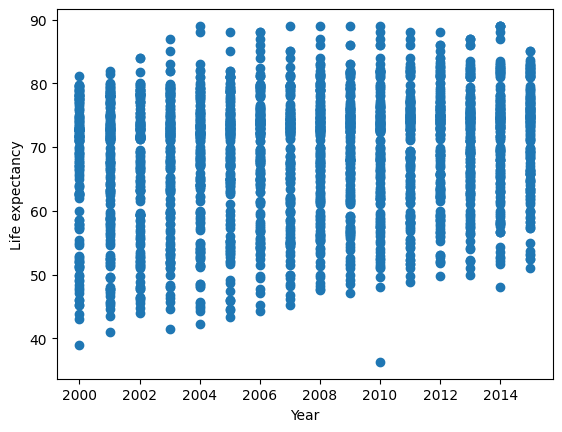

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["Year"], df["Life expectancy "])
plt.xlabel("Year")
plt.ylabel("Life expectancy")
plt.show()

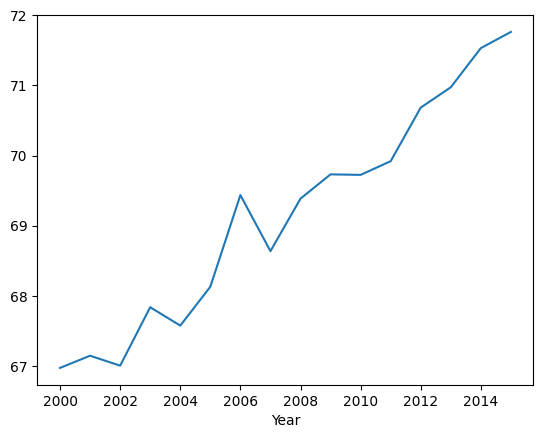

In [ ]:
grouped = df.groupby("Year")["Life expectancy "].mean()
grouped.plot(kind="line")
plt.show()

In [ ]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [ ]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Finland,2013,Developing,87.0,79.0,0,8.97,6115.496624,NaN,2,...,98.0,9.55,98.0,0.1,49638.771300,5438972.0,0.9,0.8,0.887,17.0
1,Japan,2015,Developed,83.7,55.0,2,NaN,0.000000,NaN,35,...,99.0,NaN,96.0,0.1,34474.137360,127141.0,2.1,1.8,0.902,15.3
2,Syrian Arab Republic,2014,Developing,64.4,294.0,7,0.01,0.000000,47.0,594,...,52.0,3.25,43.0,0.1,NaN,19239.0,6.3,6.1,0.575,9.0
3,Latvia,2010,Developed,72.8,18.0,0,9.80,1109.969508,91.0,0,...,92.0,6.55,92.0,0.1,11326.219470,297555.0,2.2,2.3,0.815,16.0
4,Sao Tome and Principe,2013,Developing,67.1,192.0,0,0.01,200.660099,97.0,0,...,97.0,9.76,97.0,0.2,1619.532678,18745.0,5.7,5.5,0.559,11.0


Compare the average life expectancy of "Developed" and "Developing" countries for each year 

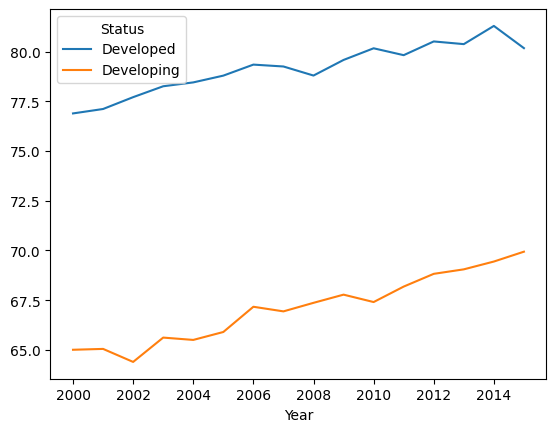

In [ ]:
grouped = df.groupby(["Year", "Status"])["Life expectancy "].mean()
grouped.unstack().plot(kind="line")
plt.show()

Get the correlation between "Life expectancy" and "GDP"

In [ ]:
corr = df["Life expectancy "].corr(df["GDP"])

In [ ]:
corr

0.4652553879500644

Find out the feature having the strongest correlation with the "Life expectancy"<br>
Note: Do not display all of the correlation values. Your code should only print the result (the name of a column).

In [ ]:
corr_matrix = df.corr()

strongest_corr_feature = corr_matrix["Life expectancy "].abs().idxmax()

<ipython-input-11-3bf380138da4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


In [ ]:
strongest_corr_feature

'Life expectancy '

In [ ]:
corr_matrix = df.corr().abs()

second_corr_feature = corr_matrix["Life expectancy "].sort_values(ascending=False)[1:].idxmax()

<ipython-input-13-38619ce52e2a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs()


In [ ]:
second_corr_feature

'Schooling'

# Preprocessing (20 points)

Remove the rows containing NaN (or null) values

In [ ]:
df = df.dropna()

Convert categorical columns into their one-hot encoded versions

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(df, columns=cat_cols)

In [ ]:
print(df.head())

    Year  Life expectancy   Adult Mortality  infant deaths  Alcohol  \
3   2010              72.8             18.0              0     9.80   
4   2013              67.1            192.0              0     0.01   
7   2005              73.1            144.0             15     4.38   
11  2012              63.4              3.0              2     0.01   
12  2014              76.6            122.0             31     5.26   

    percentage expenditure  Hepatitis B  Measles    BMI   under-five deaths   \
3              1109.969508         91.0         0   58.9                   0   
4               200.660099         97.0         0   29.3                   0   
7               531.980818         93.0         0    5.5                  18   
11               12.834474         95.0         7   36.2                   3   
12              168.173753         84.0         3   62.8                  36   

    ...  Country_Turkmenistan  Country_Uganda  Country_Ukraine  \
3   ...                   

Convert the dataframe into two numpy arrays (called `x` and `y`).<br>
To make the first array, remove the "Life expectancy" column, and convert the remaining dataframe to a numpy array.<br>
Then, use the removed column to make another numpy array (`y`).

In [ ]:
x = df.drop(columns=["Life expectancy "]).to_numpy()

y = df["Life expectancy "].to_numpy()

In [ ]:
df.columns

Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ',
       ...
       'Country_Turkmenistan', 'Country_Uganda', 'Country_Ukraine',
       'Country_Uruguay', 'Country_Uzbekistan', 'Country_Vanuatu',
       'Country_Zambia', 'Country_Zimbabwe', 'Status_Developed',
       'Status_Developing'],
      dtype='object', length=155)

Normalize the data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
print(x)

[[ 0.52684427 -1.20551632 -0.27267108 ... -0.08851417  2.49387004
  -2.49387004]
 [ 1.26862003  0.19437979 -0.27267108 ... -0.08851417 -0.40098321
   0.40098321]
 [-0.70944867 -0.19179845 -0.15310568 ... -0.08851417 -0.40098321
   0.40098321]
 ...
 [ 0.03232709  0.54033113 -0.22484492 ... -0.08851417 -0.40098321
   0.40098321]
 [-0.21493149  1.66668432  0.42080824 ... -0.08851417 -0.40098321
   0.40098321]
 [-1.94574161 -0.44925061 -0.24078697 ... -0.08851417 -0.40098321
   0.40098321]]


# Model Training

Split the data to training (80%) and testing (20%) parts (5 points)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Common Regression Class

This is a regression class and you do not need to change its code. You have to fully understand it and then create new classes for rigde and lasso regression which inherit from this class.
For initialization you have to specify learning rate, number of iteration, and a regularization object.

In [227]:
class Regression:
    def __init__(self, learning_rate, iteration, regularization):
        
        self.N = None # number of samples
        self.n = None # number of features
        self.w = None # initial weights
        self.regularization = regularization # will be the l1/l2 regularization class according to the regression model
        self.lr = learning_rate
        self.it = iteration

    def loss_function(self, y, y_pred):
        return (1 / (2*self.N)) * np.sum(np.square(y_pred - y)) + self.regularization(self.w)
    
    def hypothesis(self, weights, X):
        return np.dot(X, weights)

    def train(self, X, y):
        # Target value should be in the shape of (n, 1) not (n, ).

        # Insert constant ones for bias weights.
        X = np.insert(X, 0, 1, axis=1)

        self.N = X.shape[0]
        self.n = X.shape[1]
        self.w = np.zeros(self.n)

        for it in range(1, self.it+1):
            y_pred = self.hypothesis(self.w, X)
            cost = self.loss_function(y, y_pred)
            dw = (1/self.N) * np.dot(X.T, (y_pred - y)) + self.regularization.derivation(self.w)
            self.w = self.w - self.lr * dw

            if it % 10 == 0:
                print("The loss function for the iteration {}----->{} :)".format(it, cost))
    
    def predict(self, test_X):
        # Insert constant ones for bias weights.
        test_X = np.insert(test_X, 0, 1, axis=1)
        y_pred = self.hypothesis(self.w, test_X)
        return y_pred

# Regularization Classes (20 points)

You have to implement l2/l1 regularization.

In [ ]:
class l1_regularization:
    """Regularization used for Lasso Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be returned when we call this class."
        return self.lamda * np.sum(np.abs(weights))

    def derivation(self, weights):
        "Derivation of the regulariozation function."
        return self.lamda * np.sign(weights)


class l2_regularization:
    """Regularization used for Ridge Regression"""
    def __init__(self, lamda):
        self.lamda = lamda

    def __call__(self, weights):
        "This will be retuned when we call this class."
        return self.lamda * np.sum(np.square(weights))

    def derivation(self, weights):
        "Derivation of the regulariozation function."
        return 2 * self.lamda * weights


# Lasso Regression from scratch (5 points)

Train a lasso regression model using your own code and the following class.

In [228]:
class LassoRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l1_regularization(lamda)
        super(LassoRegression, self).__init__(learning_rate, iteration, self.regularization)

In [229]:
my_lasso = LassoRegression(lamda=0.1, learning_rate=0.001, iteration=10000)

In [230]:
my_lasso.train(X_train, y_train)

The loss function for the iteration 10----->2379.923743741642 :)
The loss function for the iteration 20----->2330.3429234902637 :)
The loss function for the iteration 30----->2281.972446438536 :)
The loss function for the iteration 40----->2234.7645326869806 :)
The loss function for the iteration 50----->2188.6752273802254 :)
The loss function for the iteration 60----->2143.6639160231125 :)
The loss function for the iteration 70----->2099.6929637062344 :)
The loss function for the iteration 80----->2056.7274258703947 :)
The loss function for the iteration 90----->2014.73490010503 :)
The loss function for the iteration 100----->1973.6848857793425 :)
The loss function for the iteration 110----->1933.5489423433257 :)
The loss function for the iteration 120----->1894.3000243389074 :)
The loss function for the iteration 130----->1855.9127925636847 :)
The loss function for the iteration 140----->1818.3631136738397 :)
The loss function for the iteration 150----->1781.6281292676342 :)
The loss

# Lasso Regression using skicit-learn (5 points)

Use `sklearn` to train a Lasso Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [231]:
sk_lasso = Lasso()

In [232]:
param_grid = {'alpha': [0.001, 0.01, .1, 1, 10, 100]}

In [233]:
grid_search = GridSearchCV(sk_lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.467e+02, tolerance: 6.610e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.602e+01, tolerance: 6.919e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+02, tolerance: 6.751e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [234]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best mean squared error:", -grid_search.best_score_)

Best hyperparameters: {'alpha': 0.001}
Best mean squared error: 3.459417088839287


In [235]:
sk_lasso = Lasso(alpha = 0.001)

In [236]:
sk_lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.497e+02, tolerance: 8.336e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

# Ridge Regression From scratch (5 points)

Train a ridge regression model using your own code and the following class.

In [237]:
class RidgeRegression(Regression):
    def __init__(self, lamda, learning_rate, iteration):
        self.regularization = l2_regularization(lamda)
        super(RidgeRegression, self).__init__(learning_rate, iteration, self.regularization)

In [ ]:
X_train

array([[-0.21493149,  0.56446727, -0.26470005, ..., -0.08851417,
        -0.40098321,  0.40098321],
       [ 0.27958568,  0.05760833,  2.68457981, ..., -0.08851417,
        -0.40098321,  0.40098321],
       [ 0.03232709, -1.18138018, -0.27267108, ..., -0.08851417,
        -0.40098321,  0.40098321],
       ...,
       [ 1.51587862,  0.00933605, -0.27267108, ..., -0.08851417,
         2.49387004, -2.49387004],
       [-1.20396584, -1.22965246, -0.27267108, ..., -0.08851417,
         2.49387004, -2.49387004],
       [ 1.02136145,  0.76560177,  0.1976195 , ..., -0.08851417,
        -0.40098321,  0.40098321]])

In [238]:
my_ridge = RidgeRegression(lamda=0.001, learning_rate=0.001, iteration=10000)
my_ridge.train(X_train, y_train)

The loss function for the iteration 10----->2379.5317467521177 :)
The loss function for the iteration 20----->2329.5180478884045 :)
The loss function for the iteration 30----->2280.741573009738 :)
The loss function for the iteration 40----->2233.1520965924865 :)
The loss function for the iteration 50----->2186.703540136961 :)
The loss function for the iteration 60----->2141.353477952617 :)
The loss function for the iteration 70----->2097.0627080117783 :)
The loss function for the iteration 80----->2053.7948790758674 :)
The loss function for the iteration 90----->2011.5161664987277 :)
The loss function for the iteration 100----->1970.1949901475411 :)
The loss function for the iteration 110----->1929.8017687757565 :)
The loss function for the iteration 120----->1890.3087059538923 :)
The loss function for the iteration 130----->1851.6896033298253 :)
The loss function for the iteration 140----->1813.9196975648408 :)
The loss function for the iteration 150----->1776.9755177877407 :)
The los

# Ridge Regression using scikit-learn (5 points)

Use `sklearn` to train a Ridge Regression Model. To determine the best regularization coefficients, use grid-search (or other techniques you've learned till now).

In [239]:
sk_ridge = Ridge()

In [240]:
param_grid = {'alpha': [0.001, 0.01, .1, 1, 10, 100]}

In [241]:
grid_search = GridSearchCV(sk_ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [242]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best mean squared error:", -grid_search.best_score_)

Best hyperparameters: {'alpha': 0.1}
Best mean squared error: 3.429153818917494


In [243]:
sk_ridge = Ridge(0.1)

In [244]:
sk_ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

# Evaluation (15 points)

For each model (the 2 models trained using `sklearn` and the ones based on your code), predict the output for the testing samples.

In [ ]:
X_test

array([[ 0.77410286, -1.23769784, -0.27267108, ..., -0.08851417,
         2.49387004, -2.49387004],
       [-0.95670726, -0.02284547, -0.23281594, ..., -0.08851417,
        -0.40098321,  0.40098321],
       [-0.95670726,  0.40355967,  0.25341668, ..., -0.08851417,
        -0.40098321,  0.40098321],
       ...,
       [ 0.77410286, -0.32052453, -0.26470005, ..., -0.08851417,
        -0.40098321,  0.40098321],
       [-0.70944867, -0.66647586, -0.27267108, ..., -0.08851417,
         2.49387004, -2.49387004],
       [-0.21493149, -0.05502699, -0.27267108, ..., -0.08851417,
        -0.40098321,  0.40098321]])

In [245]:
sk_lasso_pred = sk_lasso.predict(X_test)

In [246]:
my_lasso_pred = my_lasso.predict(X_test)

In [247]:
my_ridge_pred = my_ridge.predict(X_test)

In [248]:
sk_ridge_pred = sk_ridge.predict(X_test)

Measure the performance of the models based on "mean squared error" and the "coefficient of determination" of the prediction.

In [249]:
from sklearn.metrics import mean_squared_error, r2_score

In [250]:
mse_lasso = mean_squared_error(y_test, sk_lasso_pred)
r2_lasso = r2_score(y_test, sk_lasso_pred)


print("sklearn Lasso Regression:")
print("Mean squared error:", mse_lasso)
print("Coefficient of determination (R^2):", r2_lasso)

sklearn Lasso Regression:
Mean squared error: 3.8409334138484263
Coefficient of determination (R^2): 0.95074962914001


In [251]:
#my_lasso_pred = my_lasso_pred.reshape(-1)

mse_lasso = mean_squared_error(y_test, my_lasso_pred)
r2_lasso = r2_score(y_test, my_lasso_pred)

print("my Lasso Regression:")
print("Mean squared error:", mse_lasso)
print("Coefficient of determination (R^2):", r2_lasso)

my Lasso Regression:
Mean squared error: 6.499092459534797
Coefficient of determination (R^2): 0.9166653832812098


In [252]:
mse_ridge = mean_squared_error(y_test, my_ridge_pred)
r2_ridge = r2_score(y_test, my_ridge_pred)

print("my Ridge Regression:")
print("Mean squared error:", mse_ridge)
print("Coefficient of determination (R^2):", r2_ridge)

my Ridge Regression:
Mean squared error: 4.262067536908737
Coefficient of determination (R^2): 0.9453496366101382


In [253]:
mse_ridge = mean_squared_error(y_test, sk_ridge_pred)
r2_ridge = r2_score(y_test, sk_ridge_pred)

print("sklearn Ridge Regression:")
print("Mean squared error:", mse_ridge)
print("Coefficient of determination (R^2):", r2_ridge)

sklearn Ridge Regression:
Mean squared error: 3.816836542199142
Coefficient of determination (R^2): 0.9510586112902899


# Kaggle

In [215]:
df_ktrain = pd.read_csv("/content/assignment5-training-data.csv")

In [216]:
df_ktest = pd.read_csv("/content/assignment5-test-data.csv")

In [217]:
df_ktrain = df_ktrain.dropna()
#df_ktest = df_ktest.dropna()

In [218]:
df_ktest = df_ktest.drop('ID', axis=1)

In [209]:
# Rename specific columns
#df_ktest.rename(columns={'ID': 'Life expectancy '}, inplace=True)


In [219]:
df_ktrain_con = df_ktrain.drop(columns=["Life expectancy "])

life_exp = df_ktrain["Life expectancy "]

In [220]:
print(len(df_ktrain_con))
print(len(df_ktest))

1415
441


In [225]:
df_concat = pd.concat([df_ktrain_con, df_ktest], ignore_index=False, axis=1)

In [226]:
len(df_concat)

1603

In [178]:
cat_cols = df_concat.select_dtypes(include=['object']).columns.tolist()

df_concat = pd.get_dummies(df_concat, columns=cat_cols)

In [179]:
df_ktest = df_concat.tail(441)

# Get the rest of the dataframe
df_ktrain = df_concat.drop(df_ktest.index)

In [ ]:
# Separate the dataframes
df1 = df.iloc[:500] # First 500 rows
df2 = df.iloc[500:] # Last 500 rows


In [180]:
print(len(df_ktrain))
print(len(df_ktest))

1162
441


In [181]:
x = df_ktrain.drop(columns=["Life expectancy "]).to_numpy()

y = df_ktrain["Life expectancy "].to_numpy()

In [149]:
x_t = df_concat.to_numpy()

In [182]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [183]:
len(x)

1162

In [184]:
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(x, y, test_size=0.2, random_state=42)

In [185]:
sk_lasso = Lasso()

In [186]:
param_grid = {'alpha': [0.001, 0.01, .1, 1, 10, 100]}

In [187]:
grid_search = GridSearchCV(sk_lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.467e+02, tolerance: 6.610e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.602e+01, tolerance: 6.919e+00
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.405e+02, tolerance: 6.751e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [188]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best mean squared error:", -grid_search.best_score_)

Best hyperparameters: {'alpha': 0.001}
Best mean squared error: 3.459417088839287


In [189]:
sk_lasso = Lasso(alpha = 0.001)

In [190]:
sk_lasso.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.497e+02, tolerance: 8.336e+00
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.001)

In [191]:
sk_ridge = Ridge()

In [192]:
param_grid = {'alpha': [0.001, 0.01, .1, 1, 10, 100]}

In [193]:
grid_search = GridSearchCV(sk_ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

In [194]:
print("Best hyperparameters:", grid_search.best_params_)
print("Best mean squared error:", -grid_search.best_score_)

Best hyperparameters: {'alpha': 0.1}
Best mean squared error: 3.429153818917494


In [195]:
sk_ridge = Ridge(0.1)

In [196]:
sk_ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [ ]:
df = df.dropna()

In [ ]:
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(df, columns=cat_cols)

In [200]:
x_t = df_ktest.drop(columns=["Life expectancy "]).to_numpy()

In [201]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_t = scaler.fit_transform(x_t)

In [203]:
x_t = x_t.fillna(x_t.mean())

AttributeError: ignored

In [204]:
x_t = np.nan_to_num(x_t)

In [205]:
lasso_pred = sk_lasso.predict(x_t)

ValueError: ignored

In [ ]:
sk_ridge_pred = sk_ridge.predict(x_t)

ValueError: ignored

Competition Link: https://www.kaggle.com/t/adbf95666e7c4f41a6be1129a9e4415c